## Analysis of the North American Borehole Data
data is provided by umich and parsed in the NorthAmericanBoreHolesDataParser notebook. For more information about parsing and the link to the data refer to that notebook

*Note: make sure that you have installed rpy2 to be able to run this notebook*

In [5]:
# loading the rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Installing and loading the necessary packages 

In [87]:
%%R

install.packages("tidyverse")
install.packages("tidymodels")
library(tidyverse)
library(tidymodels)

R[write to console]: trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.2/tidyverse_1.3.2.tgz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 425892 bytes (415 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con


The downloaded binary packages are in
	/var/folders/0x/y8lgwckd5jzdqrbj98g26nym0000gn/T//RtmpssAORm/downloaded_packages


R[write to console]: trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.2/tidymodels_1.0.0.tgz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 112363 bytes (109 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co


The downloaded binary packages are in
	/var/folders/0x/y8lgwckd5jzdqrbj98g26nym0000gn/T//RtmpssAORm/downloaded_packages


# North American Borehole regression


In [49]:
%%R

# the seed is set for the ease of Reproducibility of the code given that the process of split the data into training and testing is random 
set.seed(8888)

# min depth is set to remove the influence of the weather on the temp data
minDepth = 50

# loading ther data and factoring the country
NAboreholes = read_csv("NorthAmericanBoreHoles.csv")

New names:
• `` -> `...1`
Rows: 19386 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Borehole, link, Data Contact, Country
dbl (5): ...1, Depth, Temperature, Longitude, Latitudes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [61]:
%%R

CABoreholes = NAboreholes |> 
    filter(Depth > minDepth)

In [63]:
%%R 

NAboreholes_split <- initial_split(NAboreholes, prop = 0.75, strata = Temperature)
NAboreholes_train <- training(NAboreholes_split)
NAboreholes_test <- testing(NAboreholes_split)

In [64]:
%%R

lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe <- recipe(Temperature ~ Depth, data = NAboreholes_train)

lm_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = NAboreholes_train)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)        Depth  
   7.444064     0.006191  



R[write to console]: `geom_smooth()` using formula 'y ~ x'



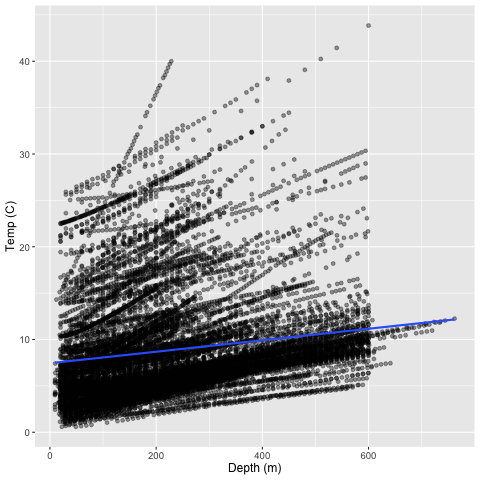

In [66]:
%%R

NA_plot_final <- ggplot(NAboreholes_train, aes(x = Depth, y = Temperature)) +
  geom_point(alpha = 0.4) +
  xlab("Depth (m)") +
  ylab("Temp (C)") +
  scale_y_continuous() +
  geom_smooth(method = "lm", se = FALSE) + 
  theme(text = element_text(size = 12))

NA_plot_final

## Canadian Borehole Linear Regression 

In [67]:
%%R

NAboreholes = NAboreholes |> mutate(Country = as.factor(Country))

In [68]:
%%R


# selecting the boreholes in Canada and filtering for mindepth 
CABoreholes = NAboreholes |> 
    filter(Country == "CA") |> 
    filter(Depth > minDepth)

In [74]:
%%R 

CABoreholes_split <- initial_split(CABoreholes, prop = 0.75, strata = Temperature)
CABoreholes_train <- training(CABoreholes_split)
CABoreholes_test <- testing(CABoreholes_split)

In [75]:
%%R

lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe <- recipe(Temperature ~ Depth, data = CABoreholes_train)

lm_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = CABoreholes_train)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)        Depth  
   4.171131     0.009888  



R[write to console]: `geom_smooth()` using formula 'y ~ x'



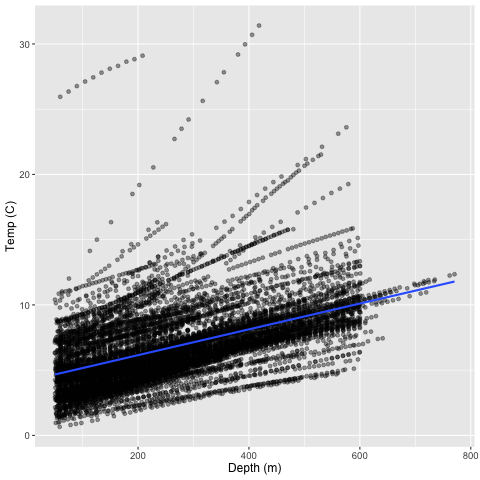

In [76]:
%%R

CA_plot_final <- ggplot(CABoreholes_train, aes(x = Depth, y = Temperature)) +
  geom_point(alpha = 0.4) +
  xlab("Depth (m)") +
  ylab("Temp (C)") +
  scale_y_continuous() +
  geom_smooth(method = "lm", se = FALSE) + 
  theme(text = element_text(size = 12))

CA_plot_final

## Finding the borehole that had the most steep increase in temp per meter depth in the chart above
In the cell below it seem like that the Borehole [CA-074-0](http://geothermal.earth.lsa.umich.edu/DATA/CA-074-0.html)

In [89]:
%%R

# Note: slope is not used to find the borehole but rather the dot highest highest temp in chart above as the highest dot belongs to the borehole
#       with the highest temp
highestTemp = CABoreholes |> arrange(desc(Temperature)) |> slice(1) 
highestTemp

# A tibble: 1 × 9
   ...1 Borehole Depth Temperature Longitude Latitudes link       `Data Contact`
  <dbl> <chr>    <dbl>       <dbl>     <dbl>     <dbl> <chr>      <chr>         
1  4386 CA-074-0  443.        32.6     -117.      49.8 http://ge… A.M. Jessop   
# … with 1 more variable: Country <fct>
